# Data preparation

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = (10, 6) 
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.grid"] = True

In [3]:
df_l_clean = pd.read_csv("labeled_engineered_features.csv")
df_l_clean


,replyDate,reply,telegramChannel,Label,anger,disgust,fear,joy,neutral,sadness,surprise,PER,LOC,MISC,ORG,char_len,token_len,has_emoji
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2,0.125049,0.010610,0.021007,0.007104,0.642493,0.043467,0.150270,2,0,0,0,55,5,False
1,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2,0.059286,0.032058,0.050663,0.003283,0.677611,0.147585,0.029514,0,0,1,0,48,4,True
2,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2,0.945323,0.006820,0.030570,0.002117,0.004961,0.007536,0.002674,1,0,0,0,56,8,False
3,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2,0.076145,0.154953,0.008257,0.002443,0.712547,0.025815,0.019841,0,1,0,0,156,17,False
4,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2,0.079072,0.024400,0.010068,0.006892,0.866802,0.006305,0.006460,0,1,0,0,27,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1630362047,Hmmm. I’m not believing this anymore. Wtf. ARR...,AnalyzingAmerica.json,1,0.526344,0.307689,0.017883,0.002801,0.020235,0.018502,0.106546,0,0,1,0,62,7,False
15056,1678747240,Indian gonna scalp her,ResisttheMainstream.json,2,0.703433,0.107107,0.051600,0.002427,0.088895,0.034580,0.011959,0,0,1,0,22,4,False
15057,1696303318,Why didn’t capital police arrest him! They wou...,ResisttheMainstream.json,1,0.794587,0.091528,0.010920,0.001076,0.033544,0.022179,0.046167,0,0,0,0,98,10,False
15058,1662850264,Pup play but they're seal pups and I club them,RiotDogs.json,0,0.044165,0.055992,0.004021,0.021880,0.828761,0.026001,0.019179,0,0,0,0,46,6,False


In [4]:
NNUMERIC = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise",
    "PER", "LOC", "MISC", "ORG", "char_len", "token_len"
]
CATEGORICAL = ["has_emoji"]

RANDOM_SEED = 22

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), NNUMERIC),
        ("cat", OneHotEncoder(), CATEGORICAL)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    df_l_clean.drop(["Label", "replyDate", "telegramChannel"], axis=1),
    df_l_clean["Label"],
    test_size=0.2, 
    random_state=RANDOM_SEED
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Catboost

In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, make_scorer

In [7]:
catboost_model = CatBoostClassifier(random_state=RANDOM_SEED)
catboost_model.fit(X_train_preprocessed, y_train)

Learning rate set to 0.089836
0:	learn: 1.0897433	total: 148ms	remaining: 2m 28s
1:	learn: 1.0809239	total: 152ms	remaining: 1m 15s
2:	learn: 1.0738555	total: 156ms	remaining: 51.7s
3:	learn: 1.0673029	total: 160ms	remaining: 39.7s
4:	learn: 1.0614497	total: 163ms	remaining: 32.5s
5:	learn: 1.0567413	total: 167ms	remaining: 27.6s
6:	learn: 1.0515095	total: 170ms	remaining: 24.2s
7:	learn: 1.0465258	total: 174ms	remaining: 21.6s
8:	learn: 1.0438130	total: 177ms	remaining: 19.5s
9:	learn: 1.0399160	total: 182ms	remaining: 18s
10:	learn: 1.0362059	total: 185ms	remaining: 16.6s
11:	learn: 1.0326488	total: 189ms	remaining: 15.6s
12:	learn: 1.0298743	total: 192ms	remaining: 14.6s
13:	learn: 1.0268746	total: 197ms	remaining: 13.8s
14:	learn: 1.0238068	total: 200ms	remaining: 13.1s
15:	learn: 1.0213383	total: 204ms	remaining: 12.6s
16:	learn: 1.0202978	total: 208ms	remaining: 12s
17:	learn: 1.0185351	total: 212ms	remaining: 11.5s
18:	learn: 1.0165687	total: 215ms	remaining: 11.1s
19:	learn: 1.

In [8]:
y_pred_cat = catboost_model.predict(X_test_preprocessed)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"Catboost accuracy: {accuracy_cat:.6f}")

Catboost accuracy: 0.509628


In [9]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [10]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [11]:
def find_best_model_params(model, params, x_train, y_train):
    search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=10,
        cv=cv,
        scoring=make_scorer(accuracy_score),
        random_state=RANDOM_SEED,
        n_jobs=1,
        verbose=3
    )
    search.fit(x_train, y_train)

    print(f"Best params: {search.best_params_}")
    print(f"Best CV accuracy: {search.best_score_:.6f}")

    return search.best_estimator_

In [12]:
# https://catboost.ai/docs/en/concepts/parameter-tuning
CATBOOST_PARAMS_GRID = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.001, 0.01, 0.1],
    "iterations": [500, 1000, 1500],
}

In [13]:
catboost_model = CatBoostClassifier(random_state=RANDOM_SEED, task_type="GPU", devices="0", verbose=0)

In [14]:
best_catboost = find_best_model_params(
    catboost_model, CATBOOST_PARAMS_GRID, X_train_preprocessed, y_train
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END depth=10, iterations=1000, learning_rate=0.001;, score=0.501 total time=  27.0s
[CV 2/5] END depth=10, iterations=1000, learning_rate=0.001;, score=0.476 total time=  24.3s
[CV 3/5] END depth=10, iterations=1000, learning_rate=0.001;, score=0.485 total time=  24.4s
[CV 4/5] END depth=10, iterations=1000, learning_rate=0.001;, score=0.482 total time=  24.4s
[CV 5/5] END depth=10, iterations=1000, learning_rate=0.001;, score=0.482 total time=  24.4s
[CV 1/5] END depth=10, iterations=1500, learning_rate=0.01;, score=0.515 total time=  32.1s
[CV 2/5] END depth=10, iterations=1500, learning_rate=0.01;, score=0.490 total time=  32.0s
[CV 3/5] END depth=10, iterations=1500, learning_rate=0.01;, score=0.510 total time=  32.2s
[CV 4/5] END depth=10, iterations=1500, learning_rate=0.01;, score=0.511 total time=  32.2s
[CV 5/5] END depth=10, iterations=1500, learning_rate=0.01;, score=0.498 total time=  31.9s
[CV 1/5] END d

In [15]:
# Finer search
CATBOOST_PARAMS_GRID = {
    "depth": [8, 10, 12],
    "learning_rate": [0.005, 0.01, 0.02],
    "iterations": [1500, 2000, 2500],
}

In [16]:
catboost_model = CatBoostClassifier(random_state=RANDOM_SEED, task_type="GPU", devices="0", verbose=0)

In [17]:
best_catboost = find_best_model_params(
    catboost_model, CATBOOST_PARAMS_GRID, X_train_preprocessed, y_train
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END depth=12, iterations=2000, learning_rate=0.02;, score=0.493 total time= 1.8min
[CV 2/5] END depth=12, iterations=2000, learning_rate=0.02;, score=0.482 total time= 1.8min
[CV 3/5] END depth=12, iterations=2000, learning_rate=0.02;, score=0.495 total time= 1.8min
[CV 4/5] END depth=12, iterations=2000, learning_rate=0.02;, score=0.505 total time= 1.8min
[CV 5/5] END depth=12, iterations=2000, learning_rate=0.02;, score=0.487 total time= 1.8min
[CV 1/5] END depth=12, iterations=2500, learning_rate=0.02;, score=0.493 total time= 2.3min
[CV 2/5] END depth=12, iterations=2500, learning_rate=0.02;, score=0.481 total time= 2.3min
[CV 3/5] END depth=12, iterations=2500, learning_rate=0.02;, score=0.489 total time= 2.3min
[CV 4/5] END depth=12, iterations=2500, learning_rate=0.02;, score=0.503 total time= 2.2min
[CV 5/5] END depth=12, iterations=2500, learning_rate=0.02;, score=0.486 total time= 2.2min
[CV 1/5] END depth=

In [18]:
best_catboost.save_model("best_catboost.cbm")

# XGBoost

In [19]:
from xgboost import XGBClassifier

In [20]:
# For multiclass classification https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier
xgboost_model = XGBClassifier(random_state=RANDOM_SEED, objective="multi:softprob", eval_metric="mlogloss")
xgboost_model.fit(X_train_preprocessed, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [21]:
y_pred_xg = xgboost_model.predict(X_test_preprocessed)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f"Xgboost accuracy: {accuracy_xg:.6f}")

Xgboost accuracy: 0.502656


In [22]:
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning#2.-XGBoost-hyperparameters-
XGBOOST_PARAMS_GRID = {
    "max_depth": [4, 6, 8, 10],
    "eta": [0.001, 0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

In [23]:
xgboost_model = XGBClassifier(
    random_state=RANDOM_SEED, objective="multi:softprob", eval_metric="mlogloss", device="cuda"
)

In [24]:
best_xgboost = find_best_model_params(
    xgboost_model, XGBOOST_PARAMS_GRID, X_train_preprocessed, y_train
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\artur\source\prog_ag\proj\.venv\Lib\site-packages\xgboost\core.py:774: UserWarning: [05:02:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV 1/5] END eta=0.1, max_depth=8, n_estimators=300;, score=0.484 total time=   3.8s
[CV 2/5] END eta=0.1, max_depth=8, n_estimators=300;, score=0.492 total time=   3.7s
[CV 3/5] END eta=0.1, max_depth=8, n_estimators=300;, score=0.483 total time=   3.6s
[CV 4/5] END eta=0.1, max_depth=8, n_estimators=300;, score=0.490 total time=   3.7s
[CV 5/5] END eta=0.1, max_depth=8, n_estimators=300;, score=0.497 total time=   3.7s
[CV 1/5] END eta=0.01, max_depth=4, n_estimators=100;, score=0.495 total time=   0.5s
[CV 2/5] END eta=0.01, max_depth=4, n_estimators=100;, score=0.477 total time=   0.5s
[CV 3/5] END eta=0.01, max_depth=4, n_estimators=100;, score=0.480 total time=   0.5s
[CV 4/5] END eta=0.01, max_depth=4, n_estimators=100;, score=0.482 total time=   0.5s
[CV 5/5] END eta=0.01, max_depth=4, n_estimators=100;, score=0.496 total time=   0.5s
[CV 1/5] END eta=0.1, max_depth=4, n_estimators=200;, score=0.502 total time=   1.1s
[CV 2/5] END eta=0.1, max_depth=4, n_estimators=200;, score=

In [25]:
best_xgboost.save_model("best_xgboost.model")

c:\Users\artur\source\prog_ag\proj\.venv\Lib\site-packages\xgboost\sklearn.py:1115: UserWarning: [05:04:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)


# LightGBM

In [26]:
from lightgbm import LGBMClassifier

In [27]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [28]:
lightgbm_model = LGBMClassifier(random_state=RANDOM_SEED, verbosity=0)
lightgbm_model.fit(X_train_preprocessed, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [29]:
y_pred_lgbm = lightgbm_model.predict(X_test_preprocessed)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Lightgbm accuracy: {accuracy_lgbm:.6f}")

Lightgbm accuracy: 0.501660


In [30]:
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
LIGHTGBM_PARAMS_GRID = {
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "num_leaves": [15, 31, 63],
}

In [31]:
lightgbm_model = LGBMClassifier(random_state=RANDOM_SEED, device_type="gpu", verbosity=-1)

In [32]:
best_lightgbm = find_best_model_params(
    lightgbm_model, LIGHTGBM_PARAMS_GRID, X_train_preprocessed, y_train
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.2, max_depth=6, n_estimators=100, num_leaves=63;, score=0.501 total time=   1.8s
[CV 2/5] END learning_rate=0.2, max_depth=6, n_estimators=100, num_leaves=63;, score=0.489 total time=   1.5s
[CV 3/5] END learning_rate=0.2, max_depth=6, n_estimators=100, num_leaves=63;, score=0.484 total time=   1.5s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=100, num_leaves=63;, score=0.495 total time=   1.5s
[CV 5/5] END learning_rate=0.2, max_depth=6, n_estimators=100, num_leaves=63;, score=0.491 total time=   1.4s
[CV 1/5] END learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=63;, score=0.505 total time=   3.3s
[CV 2/5] END learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=63;, score=0.480 total time=   3.3s
[CV 3/5] END learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=63;, score=0.490 total time=   3.3s
[CV 4/5] END learning_rate=0.01, max_depth=8, n_estimato

In [33]:
best_lightgbm.booster_.save_model("best_lightgbm.txt")

# Comparisson

## Accuracy

In [34]:
y_pred_cat = best_catboost.predict(X_test_preprocessed)
accuracy_cat = accuracy_score(y_test, y_pred_cat)

y_pred_xgb = best_xgboost.predict(X_test_preprocessed)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

y_pred_lgbm = best_lightgbm.predict(X_test_preprocessed)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

print("Accuracy:")
print(f"Catboost accuracy: {accuracy_cat:.4f}")
print(f"Xgboost accuracy: {accuracy_xgb:.4f}")
print(f"Lightgbm accuracy: {accuracy_lgbm:.4f}")
print("Baseline (bert) accuracy: 0.8612")

Accuracy:
Catboost accuracy: 0.5106
Xgboost accuracy: 0.5053
Lightgbm accuracy: 0.5093
Baseline (bert) accuracy: 0.8612


## Filesize

In [35]:
import os
import pickle

In [36]:
with open("best_catboost.pkl", "wb") as f:
    pickle.dump(best_catboost, f)

with open("best_xgboost.pkl", "wb") as f:
    pickle.dump(best_xgboost, f)

with open("best_lightgbm.pkl", "wb") as f:
    pickle.dump(best_lightgbm, f)

cat_filesize = os.path.getsize("best_catboost.pkl")
xgb_filesize = os.path.getsize("best_xgboost.pkl")
lgbm_filesize = os.path.getsize("best_lightgbm.pkl")
bert_filesize = os.path.getsize("naive_bert_classifier_full.pth")

print("Filesize (pickle):")
print(f"Catboost filesize: {(cat_filesize / 1024 / 1024):.3f} mb")
print(f"Xgboost filesize: {(xgb_filesize / 1024 / 1024):.3f} mb")
print(f"Lightgbm filesize: {(lgbm_filesize / 1024 / 1024):.3f} mb")
print(f"Baseline (bert) filesize: {(bert_filesize / 1024 / 1024):.3f} mb")

Filesize (pickle):
Catboost filesize: 11.882 mb
Xgboost filesize: 0.930 mb
Lightgbm filesize: 5.976 mb
Baseline (bert) filesize: 417.775 mb


## Inference time

In [37]:
import time

In [38]:
def average_inference_time(model, x_test, times = 10):
    time_list = []

    for _ in range(times):
        start = time.time()
        model.predict(x_test)
        end = time.time()

        time_list.append(end - start)

    return sum(time_list) / len(time_list)

In [39]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer

c:\Users\artur\source\prog_ag\proj\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
model = torch.load("naive_bert_classifier_full.pth", weights_only=False)
model.eval() 

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

new_texts = df_l_clean["reply"].values
new_labels = df_l_clean["Label"].values

# Create a new dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(label, dtype=torch.long)
        }
    
# Different data from classifiers, but the same size
df_l_test = df_l_clean.sample(frac=0.2).reset_index(drop=True)

test_dataset = TextDataset(df_l_test["reply"], df_l_test["Label"], tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=0)

In [41]:
def average_inference_time_torch(model, dataloader, device, times = 10):
    time_list = []

    for _ in range(times):
        start = time.time()

        with torch.no_grad():
            for batch in dataloader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                _ = model(input_ids, attention_mask=attention_mask)
        
        end = time.time()

        time_list.append(end - start)

    return sum(time_list) / len(time_list)

In [42]:
cat_time = average_inference_time(best_catboost, X_test_preprocessed)
xgb_time = average_inference_time(best_xgboost, X_test_preprocessed)
lgbm_time = average_inference_time(best_lightgbm, X_test_preprocessed)
bert_time = average_inference_time_torch(model, test_dataloader, device)

print("Inference time:")
print(f"Catboost time: {cat_time:.6f} s")
print(f"Xgboost time: {xgb_time:.6f} s")
print(f"Lightgbm time: {lgbm_time:.6f} s")
print(f"Baseline (bert) time: {bert_time:.6f} s")

Inference time:
Catboost time: 0.014986 s
Xgboost time: 0.016122 s
Lightgbm time: 0.029799 s
Baseline (bert) time: 11.544861 s


# Feature importance

In [43]:
feature_importances_cat = best_catboost.get_feature_importance()
feature_names_cat = preprocessor.get_feature_names_out()

In [44]:
combined_features_cat = list(zip(feature_importances_cat, feature_names_cat))
combined_features_cat.sort(key=lambda x: x[0], reverse=True)

feature_importances_cat = [x[0] for x in combined_features_cat]
feature_names_cat = [x[1] for x in combined_features_cat]

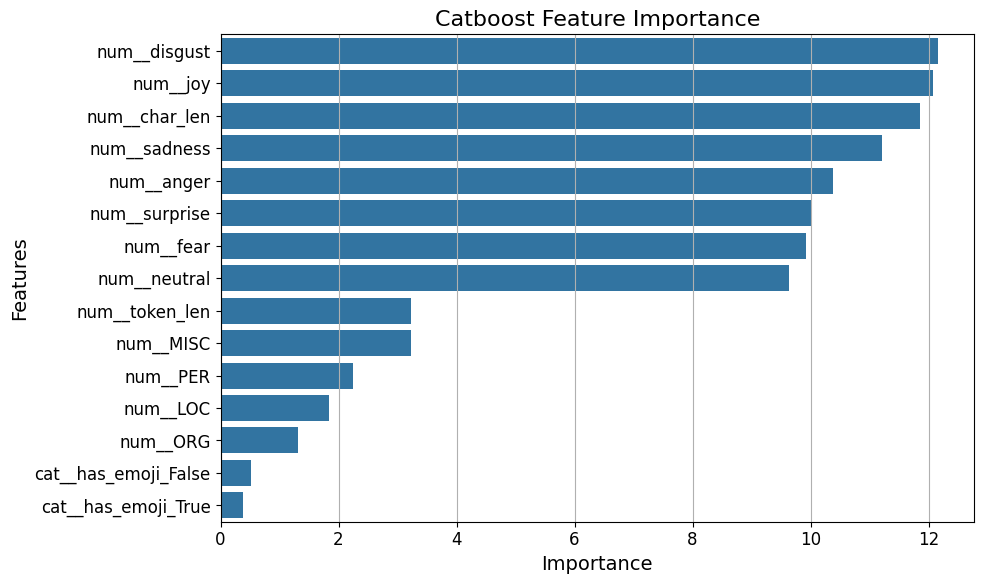

In [45]:
sns.barplot(x=feature_importances_cat, y=feature_names_cat)
plt.title("Catboost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [46]:
feature_importances_xgb = best_xgboost.feature_importances_
feature_names_xgb = preprocessor.get_feature_names_out()

In [47]:
combined_features_xgb = list(zip(feature_importances_xgb, feature_names_xgb))
combined_features_xgb.sort(key=lambda x: x[0], reverse=True)

feature_importances_xgb = [x[0] for x in combined_features_xgb]
feature_names_xgb = [x[1] for x in combined_features_xgb]

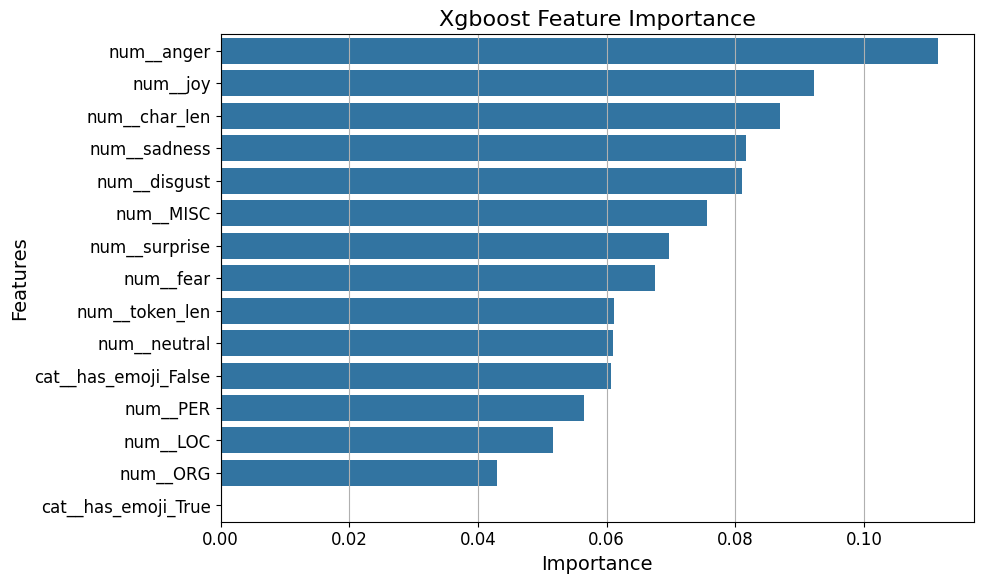

In [48]:
sns.barplot(x=feature_importances_xgb, y=feature_names_xgb)
plt.title("Xgboost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [49]:
feature_importances_lgbm = best_lightgbm.feature_importances_
feature_names_lgbm = preprocessor.get_feature_names_out()

In [50]:
combined_features_lgbm = list(zip(feature_importances_lgbm, feature_names_lgbm))
combined_features_lgbm.sort(key=lambda x: x[0], reverse=True)

feature_importances_lgbm = [x[0] for x in combined_features_lgbm]
feature_names_lgbm = [x[1] for x in combined_features_lgbm]

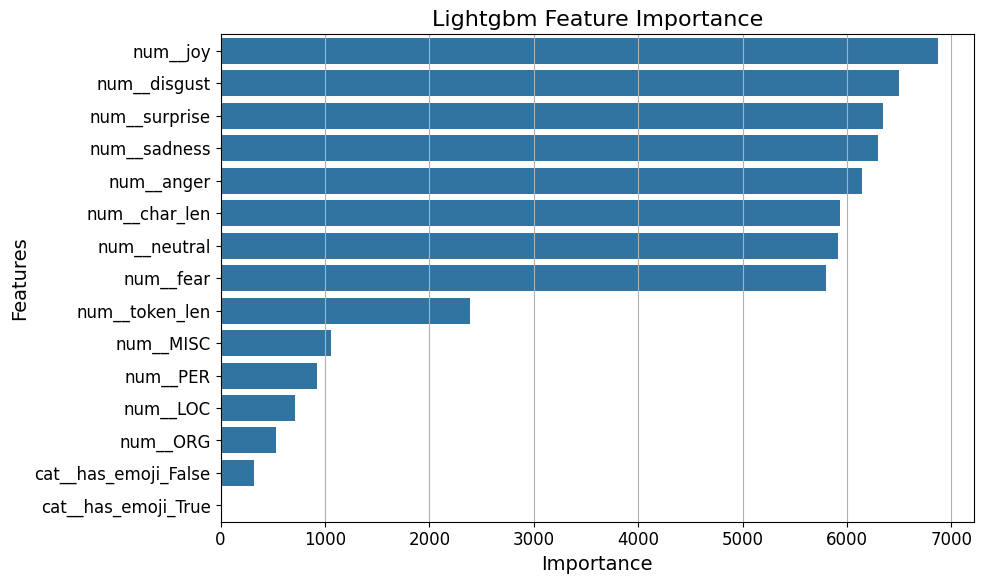

In [51]:
sns.barplot(x=feature_importances_lgbm, y=feature_names_lgbm)
plt.title("Lightgbm Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Feature importance mini conclusion
Feature importances for all models generally agree with the predictions based on H-statistic. Based on the intersection of top-5 features between model's importance and H-statistic, the Xgboost was found to be most similar to predictions. On the other hand, Catboost was found to be surprisingly dissimilar.

# Conclussion

Catboost, Xgboost and Lightgbm have approximately the same (and unsatisfactory) accuracy. Xgboost has the smallest pickle filesize while Catboost has the largest filesize, although a spread between 1 and 10 mb is not significant nowadays. Lightgbm was almost twice as slow as Catboost and Xgboost in inference. All in all, Catboost, Xgboost and Lightgbm win tens to hundreds times over Bert model in terms of inference time and filesize, however their accuracy is unsatisfactory. 